# Data Visualization and manipulations

In [86]:
import sys
import numpy as np
from numpy import set_printoptions
set_printoptions(precision=3)
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,12)
import seaborn as sns
from IPython.display import display

# Load diabetes data from CSV file

In [53]:
filename = "../data/pima-indians-diabetes.data.csv"
columns = ['pregnant', 'plasma_glucose', 'blood_pressure', 'skin_fold', 'serum_insulin', 
           'bmi', 'pedigree', 'age', 'class']
data = pd.read_csv(filename, names=columns)

In [54]:
display(data.head())
display(data.sample(5, random_state=1))
print "Data Rows: {}, Cols: {}".format(data.shape[0], data.shape[1])

,pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
285,7,136,74,26,135,26.0,0.647,51,0
101,1,151,60,0,0,26.1,0.179,22,0
581,6,109,60,27,0,25.0,0.206,27,0
352,3,61,82,28,0,34.4,0.243,46,0
726,1,116,78,29,180,36.1,0.496,25,0


Data Rows: 768, Cols: 9


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant          768 non-null int64
plasma_glucose    768 non-null int64
blood_pressure    768 non-null int64
skin_fold         768 non-null int64
serum_insulin     768 non-null int64
bmi               768 non-null float64
pedigree          768 non-null float64
age               768 non-null int64
class             768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
data.describe()

,pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#  `groupby` operation to consolidate columns

In [57]:
display(data.groupby('class').sum())
display(data.groupby('class').mean())

,pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age
class,,,,,,,,
0,1649,54990,34092,9832,34396,15152.1,214.867,15595
1,1304,37857,18981,5940,26890,9418.2,147.534,9934


,pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age
class,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# `apply` to manipulate columns

You can pass in any `function`, Return type depends on whether passed function aggregates

In [58]:
display(data.apply(np.mean))
display(data.apply(np.sin).head())

pregnant            3.845052
plasma_glucose    120.894531
blood_pressure     69.105469
skin_fold          20.536458
serum_insulin      79.799479
bmi                31.992578
pedigree            0.471876
age                33.240885
class               0.348958
dtype: float64

,pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
0,-0.279415,-0.338333,0.253823,-0.428183,0.000000,0.817766,0.586718,-0.262375,0.841471
1,0.841471,-0.176076,-0.026551,-0.663634,0.000000,0.994645,0.343837,-0.404038,0.000000
2,0.989358,0.708680,0.920026,0.000000,0.000000,-0.965888,0.622552,0.551427,0.841471
3,0.841471,0.860069,-0.026551,-0.846220,-0.245252,0.173452,0.166225,0.836656,0.000000
4,0.000000,-0.942514,0.745113,-0.428183,-0.997173,-0.772200,0.753647,0.999912,0.841471


# Correlation

In [59]:
corr = data.corr(method='pearson')
corr

,pregnant,plasma_glucose,blood_pressure,skin_fold,serum_insulin,bmi,pedigree,age,class
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma_glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
blood_pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin_fold,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
serum_insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


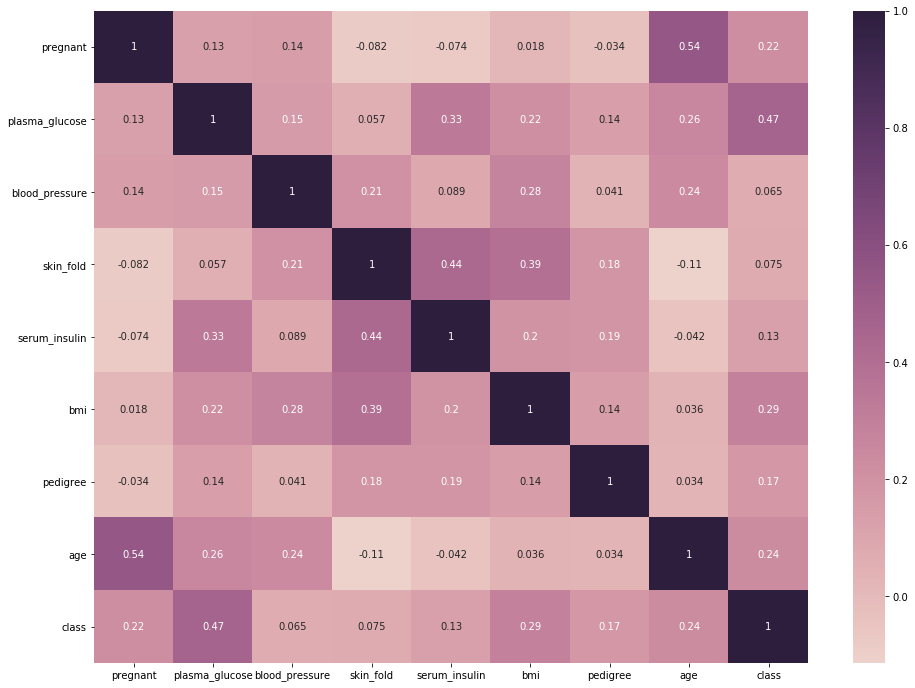

In [60]:
sns.heatmap(corr, cmap=sns.cubehelix_palette(as_cmap=True), annot=True)

# Skewness

In [61]:
data.skew()

pregnant          0.901674
plasma_glucose    0.173754
blood_pressure   -1.843608
skin_fold         0.109372
serum_insulin     2.272251
bmi              -0.428982
pedigree          1.919911
age               1.129597
class             0.635017
dtype: float64

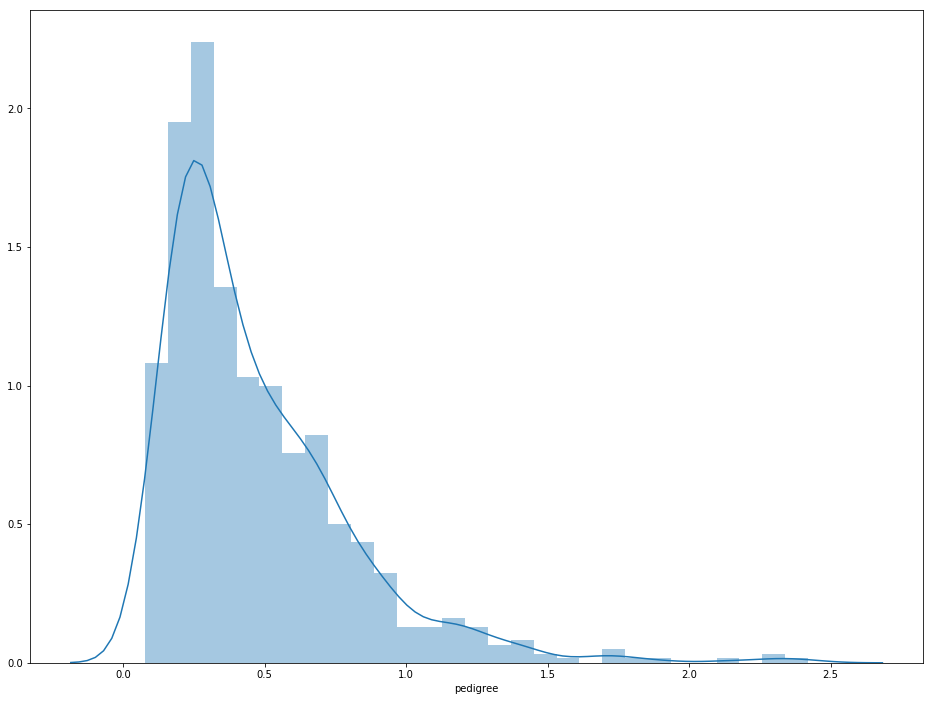

In [62]:
# Right Skew
sns.distplot(data['pedigree'])

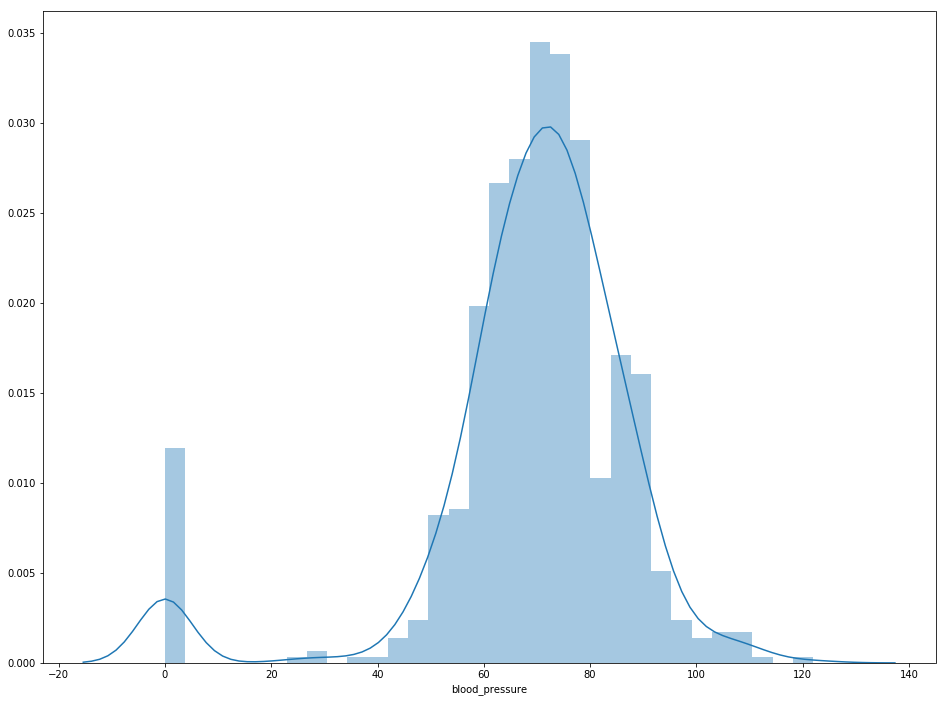

In [63]:
# Left Skew
sns.distplot(data['blood_pressure'])

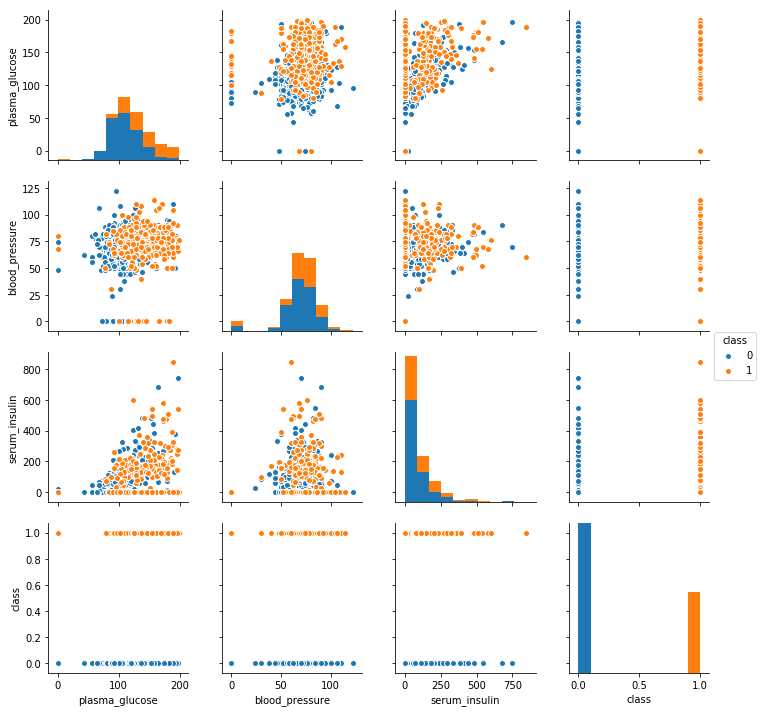

In [64]:
sns.pairplot(data[['plasma_glucose', 'blood_pressure', 'serum_insulin', 'class']], hue="class")

# Feature Selections

### Univariate Selection

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [70]:
array = data.values
X = array[:,0:8]
Y = array[:,8]
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)
print(fit.scores_)

[  111.52   1411.887    17.605    53.108  2175.565   127.669     5.393
   181.304]


### Recursive Feature Elimination

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [73]:
model = LogisticRegression() # Model does not matter much
# Select top 5 features
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [ True  True  True False False  True  True False]
Feature Ranking: [1 1 1 3 4 1 1 2]


### Feature importance using Random forest

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[ 0.096  0.216  0.098  0.084  0.073  0.158  0.125  0.149]


# Statistical Learning Techniques

### Extratrees Classifier

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)
# model = LogisticRegression()
model = ExtraTreesClassifier(max_depth=100)
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 73.377%


---
# Basic Neural Network

## Cross-entropy Loss or Negative Log Likelihood

$$-\frac{1}{N}\sum_{n \epsilon N}\sum_{i \epsilon C} y_{n,i} log \hat{y}_{n,i}$$


### Gradients

---

$$\delta_{2} = \hat{y} - y$$

$$\delta_{1} = \delta_{2} W_{2}^{T}\odot a_{1} \odot (1 - a_{1})$$

---

$$ \frac{\delta L}{\delta W_{2}} = a^{T}_{1} \delta_{2}$$

$$ \frac{\delta L}{\delta b_{2}} = \delta_{2}$$

$$ \frac{\delta L}{\delta W_{1}} = x^{T} \delta_{1}$$

$$ \frac{\delta L}{\delta b_{2}} = \delta_{1}$$

In [98]:
class NeuralNetwork(object):
    
    def __init__(self, n_features=10, n_output=10, n_hidden=100, 
                 learning_rate=0.001, reg_lambda=None):
        
        ### Network Dimensions
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        
        ### Initialize weights
        self.w_hid = np.random.randn(self.n_features, self.n_hidden)
        self.b_hid = np.random.randn(self.n_hidden)
        self.w_out = np.random.randn(self.n_hidden, self.n_output)
        self.b_out = np.random.randn(self.n_output)
        
        ### Hyper parameters
        self.learning_rate = learning_rate
        self.reg_lambda = reg_lambda
        
    def _one_hotize(self, y, k):
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot
    
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def _softmax(self, x):
        exp_x = np.exp(x)
        return exp_x / exp_x.sum(axis=1, keepdims=True)
    
    def train(self, input_list, target_list):
        ### Convert inputs list to 2d array
        inputs = np.array(input_list, ndmin=2)
        targets = np.array(target_list, ndmin=2)
        targets = self._one_hotize(targets, self.n_output).T
        
        ### Forward 
        A = self._sigmoid(inputs.dot(self.w_hid) + self.b_hid)
        Y = self._softmax(A.dot(self.w_out) + self.b_out)
        
        ### Calculate Loss ###
        loss = np.sum(targets * np.log(Y))/len(targets)
        
        ### Backward
        # Total Error
        delta2 = Y - targets
        delta1 = delta2.dot(self.w_out.T) * A * (1 - A)
        
        dw_out = A.T.dot(delta2)
        db_out = delta2.sum(axis=0)
        dw_hid = inputs.T.dot(delta1)
        db_hid = delta1.sum(axis=0)
        
        ### Add L2 regularization terms (b1 and b2 don't have regularization terms)
        if reg_lambda:
            dw_out += self.reg_lambda * self.w_out
            dw_hid += self.reg_lambda * self.w_hid
        
        ### Update Weights
        self.w_hid -= self.learning_rate * dw_hid
        self.b_hid -= self.learning_rate * db_hid
        self.w_out -= self.learning_rate * dw_out
        self.b_out -= self.learning_rate * db_out
        
        return loss

    
    def inference(self, input_list):
        inputs = np.array(input_list, ndmin=2)
        A = self._sigmoid(inputs.dot(self.w_hid) + self.b_hid)
        Y = self._softmax(A.dot(self.w_out) + self.b_out)
        return Y
    
    def get_accuracy(self, input_list, target_labels):
        preds = np.argmax(self.inference(input_list), axis=1)
        accuracy = np.sum(target_labels == preds, axis=0) * 1.0/len(target_labels)
        return accuracy
    

In [136]:
### Load Data ###
filename = "../data/pima-indians-diabetes.data.csv"
columns = ['pregnant', 'plasma_glucose', 'blood_pressure', 'skin_fold', 'serum_insulin', 
           'bmi', 'pedigree', 'age', 'class']
data = pd.read_csv(filename, names=columns)

#### Normalize Data ###
feature_columns = ['pregnant', 'plasma_glucose', 'blood_pressure', 'skin_fold', 
                   'serum_insulin', 'bmi', 'pedigree', 'age']
scaled_features = {}
for col in feature_columns:
    mean, std = data[col].mean(), data[col].std()
    scaled_features[col] = [mean, std]
    data.loc[:, col] = (data[col] - mean)/std

#### Drop Less "Important" columns ###
data = data.drop(['pregnant', 'blood_pressure', 'skin_fold', 
                  'serum_insulin', 'pedigree'], axis=1)
    
### Train/Test Split ###
X = data.iloc[:,:-1]
y = data.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

epochs = 1000
n_features = X_train.shape[1]
n_output = 2
n_hidden = 100
learning_rate = 0.001
reg_lambda = 0.001

### Stats ###
training_stats = {'training_acc': [], 'validation_acc': [], 'loss': []}

network = NeuralNetwork(n_features, n_output, n_hidden, learning_rate, reg_lambda)
for e in range(epochs):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(X_train.index, size=128)
    loss = 0
    n = 0
    for record, target in zip(X_train.ix[batch].values, y_train.ix[batch]['class']):
        loss += network.train(record, target)
        n += 1
    loss = loss/n
    training_stats['loss'].append(loss)

    # Printing out the training progress
    train_acc = network.get_accuracy(X_train, list(y_train['class']))
    val_acc = network.get_accuracy(X_test, list(y_test['class']))
    sys.stdout.write("\rProgress: " + str(100 * e/float(epochs))[:4] \
                     + "% ... Training acc: {}%".format(str(train_acc * 100)[:5]) \
                     + " ... Validation acc: {}%".format(str(val_acc * 100)[:5]))
    training_stats['training_acc'].append(train_acc)
    training_stats['validation_acc'].append(val_acc)
print "\n-------"

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


Progress: 99.9% ... Training acc: 78.33% ... Validation acc: 76.62%
-------


,loss,training_acc,validation_acc
0,-1.666474,0.667752,0.649351
1,-0.918744,0.643322,0.629870
2,-0.683185,0.636808,0.610390
3,-0.640700,0.667752,0.662338
4,-0.575221,0.662866,0.623377


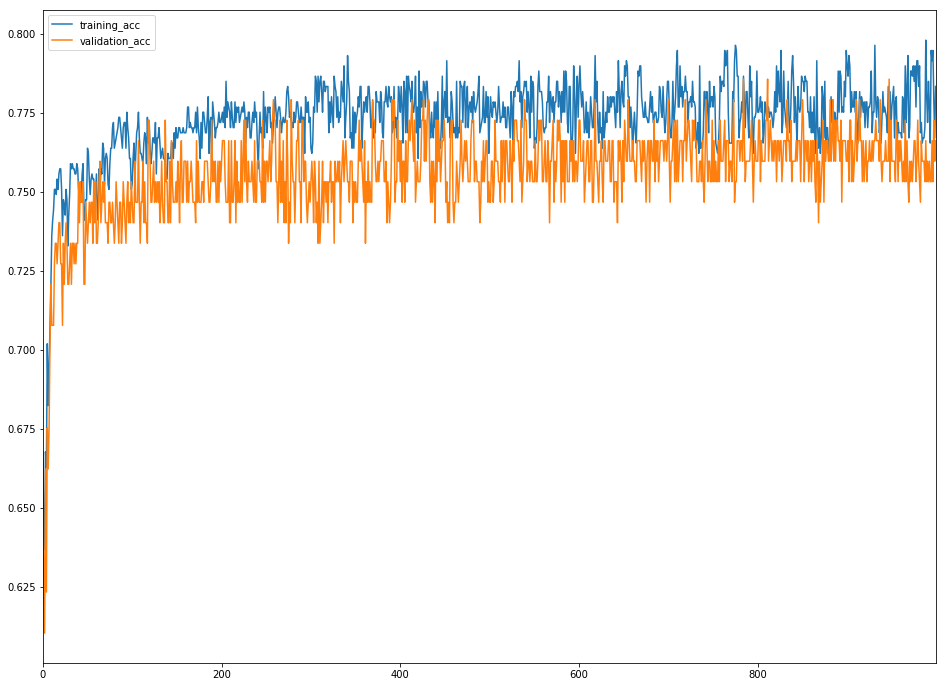

In [137]:
stats_df = pd.DataFrame.from_dict(training_stats)
display(stats_df.head())
stats_df[['training_acc', 'validation_acc']].plot()